# 一、数据预处理

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

In [4]:
x_train_image.shape,x_test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
import matplotlib.pyplot as plt
def plot_iamge(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

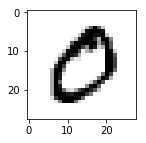

In [7]:
plot_iamge(x_train_image[1])

In [9]:
y_train_label[1]

0

In [10]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title= "label="+str(labels[idx])
        if len(prediction)>0:
            title += ",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

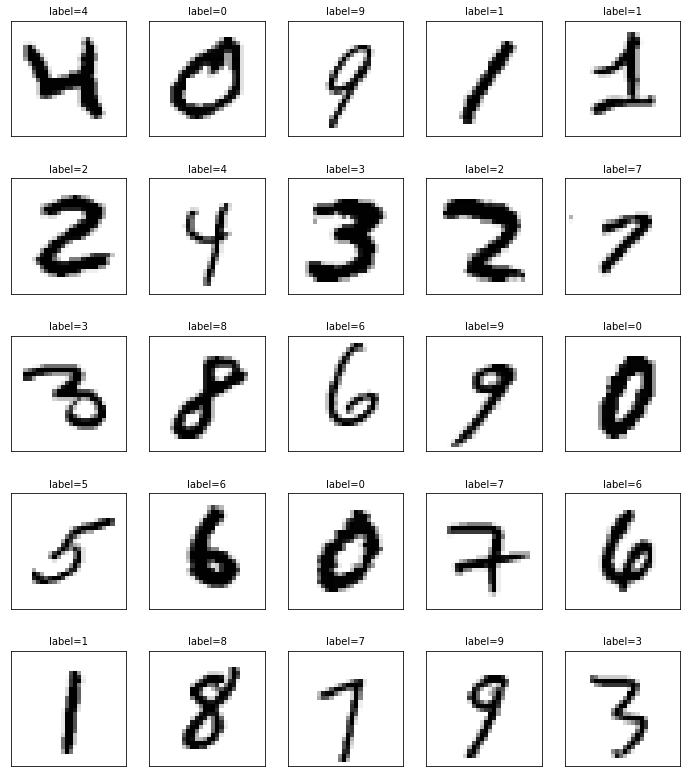

In [11]:
plot_images_labels_prediction(x_train_image,y_train_label,[],20,30)

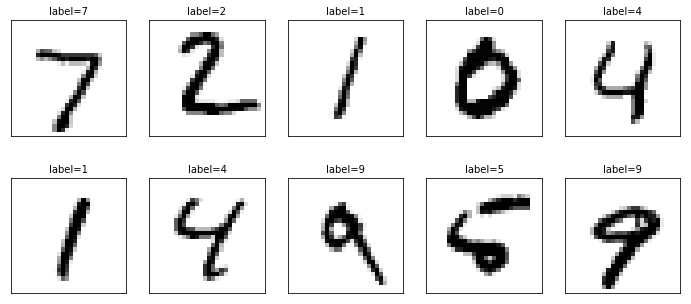

In [12]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

In [14]:
x_Train=x_train_image.reshape(-1,784).astype('float32')
x_Test=x_test_image.reshape(-1,784).astype('float32')

In [15]:
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [19]:
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)

# 二、多层感知机识别手写体数字

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
model=Sequential()
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
model.summary(0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 59us/step - loss: 0.4434 - acc: 0.8813 - val_loss: 0.2193 - val_acc: 0.9400
Epoch 2/10
48000/48000 [==============================] - 1s 19us/step - loss: 0.1916 - acc: 0.9450 - val_loss: 0.1558 - val_acc: 0.9555
Epoch 3/10
48000/48000 [==============================] - 1s 18us/step - loss: 0.1358 - acc: 0.9615 - val_loss: 0.1262 - val_acc: 0.9645
Epoch 4/10
48000/48000 [==============================] - 1s 19us/step - loss: 0.1031 - acc: 0.9702 - val_loss: 0.1125 - val_acc: 0.9674
Epoch 5/10
48000/48000 [==============================] - 1s 18us/step - loss: 0.0813 - acc: 0.9774 - val_loss: 0.0986 - val_acc: 0.9714
Epoch 6/10
48000/48000 [==============================] - 1s 18us/step - loss: 0.0660 - acc: 0.9815 - val_loss: 0.0937 - val_acc: 0.9720
Epoch 7/10
48000/48000 [==============================] - 1s 18us/step - loss: 0.0545 - acc: 0.9850 - val_loss: 0.0911 - val_acc

In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

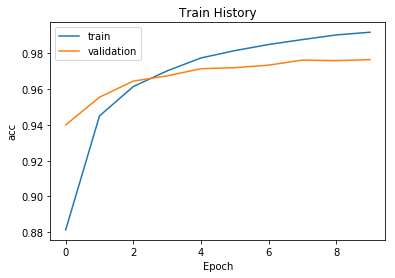

In [26]:
show_train_history(train_history,'acc','val_acc')

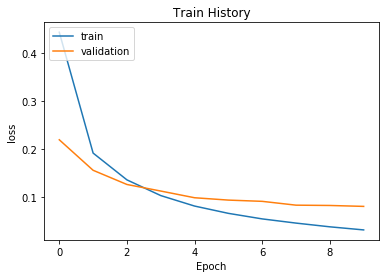

In [27]:
show_train_history(train_history,'loss','val_loss')

In [28]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 35us/step

accuracy= 0.9769


In [30]:
prediction=model.predict_classes(x_Test_normalize)

In [31]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

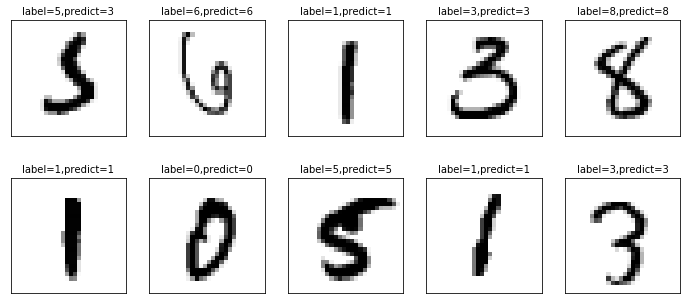

In [32]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [33]:
to_show_x=x_test_image[y_test_label!=prediction]

In [34]:
to_show_y=y_test_label[y_test_label!=prediction]

In [35]:
to_show_p=prediction[y_test_label!=prediction]

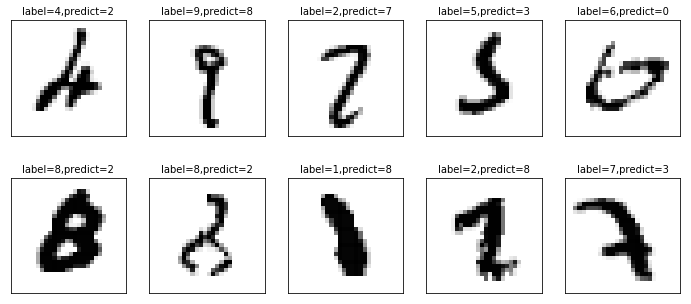

In [36]:
plot_images_labels_prediction(to_show_x,to_show_y,to_show_p,idx=0)

# 三、混淆矩阵

In [37]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,4,0,1013,0,1,0,2,4,7,1
3,0,0,5,989,0,2,0,3,6,5
4,1,0,5,1,961,0,3,0,2,9
5,2,0,0,13,1,861,5,1,6,3
6,6,3,3,1,4,3,936,0,2,0
7,0,5,12,7,1,0,0,989,6,8
8,3,0,3,5,1,2,1,2,956,1


In [38]:
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [40]:
len(df)

10000

In [39]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


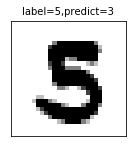

In [41]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1003,num=1)

# 四、增加隐藏层到10000

In [42]:
model=Sequential()
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
model.summary(0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.2951 - acc: 0.9153 - val_loss: 0.1536 - val_acc: 0.9563
Epoch 2/10
 - 1s - loss: 0.1154 - acc: 0.9673 - val_loss: 0.1206 - val_acc: 0.9637
Epoch 3/10
 - 1s - loss: 0.0738 - acc: 0.9793 - val_loss: 0.0927 - val_acc: 0.9730
Epoch 4/10
 - 1s - loss: 0.0523 - acc: 0.9853 - val_loss: 0.0817 - val_acc: 0.9744
Epoch 5/10
 - 1s - loss: 0.0360 - acc: 0.9904 - val_loss: 0.0824 - val_acc: 0.9753
Epoch 6/10
 - 1s - loss: 0.0248 - acc: 0.9939 - val_loss: 0.0745 - val_acc: 0.9783
Epoch 7/10
 - 1s - loss: 0.0185 - acc: 0.9954 - val_loss: 0.0731 - val_acc: 0.9777
Epoch 8/10
 - 1s - loss: 0.0136 - acc: 0.9967 - val_loss: 0.0741 - val_acc: 0.9788
Epoch 9/10
 - 1s - loss: 0.0102 - acc: 0.9981 - val_loss: 0.0722 - val_acc: 0.9793
Epoch 10/10
 - 1s - loss: 0.0068 - acc: 0.9991 - val_loss: 0.0792 - val_acc: 0.9778


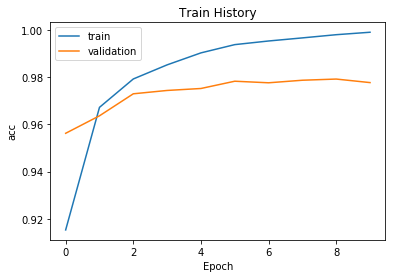

In [44]:
show_train_history(train_history,'acc','val_acc')

In [45]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 36us/step

accuracy= 0.9792


# 五、多层感知机加入DropOut

In [46]:
from keras.layers import Dropout

In [47]:
model=Sequential()
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
model.summary(0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.3573 - acc: 0.8927 - val_loss: 0.1622 - val_acc: 0.9542
Epoch 2/10
 - 1s - loss: 0.1597 - acc: 0.9534 - val_loss: 0.1184 - val_acc: 0.9645
Epoch 3/10
 - 1s - loss: 0.1153 - acc: 0.9669 - val_loss: 0.0970 - val_acc: 0.9698
Epoch 4/10
 - 1s - loss: 0.0916 - acc: 0.9728 - val_loss: 0.0858 - val_acc: 0.9733
Epoch 5/10
 - 1s - loss: 0.0743 - acc: 0.9776 - val_loss: 0.0797 - val_acc: 0.9757
Epoch 6/10
 - 1s - loss: 0.0640 - acc: 0.9803 - val_loss: 0.0761 - val_acc: 0.9774
Epoch 7/10
 - 1s - loss: 0.0547 - acc: 0.9831 - val_loss: 0.0760 - val_acc: 0.9778
Epoch 8/10
 - 1s - loss: 0.0463 - acc: 0.9855 - val_loss: 0.0709 - val_acc: 0.9793
Epoch 9/10
 - 1s - loss: 0.0416 - acc: 0.9871 - val_loss: 0.0692 - val_acc: 0.9803
Epoch 10/10
 - 1s - loss: 0.0375 - acc: 0.9882 - val_loss: 0.0663 - val_acc: 0.9804


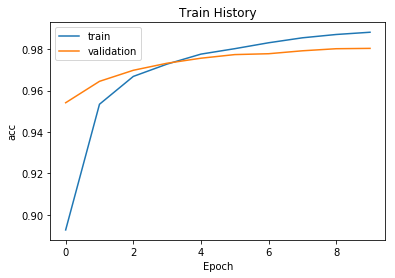

In [49]:
show_train_history(train_history,'acc','val_acc')

In [67]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 32us/step

accuracy= 0.9826


# 六、多层感知机包模型包含两个隐藏层

In [50]:
model=Sequential()
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
model.summary(0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.3772 - acc: 0.8824 - val_loss: 0.1345 - val_acc: 0.9602
Epoch 2/10
 - 2s - loss: 0.1601 - acc: 0.9502 - val_loss: 0.0989 - val_acc: 0.9696
Epoch 3/10
 - 2s - loss: 0.1207 - acc: 0.9632 - val_loss: 0.0877 - val_acc: 0.9731
Epoch 4/10
 - 2s - loss: 0.0970 - acc: 0.9693 - val_loss: 0.0804 - val_acc: 0.9749
Epoch 5/10
 - 2s - loss: 0.0831 - acc: 0.9733 - val_loss: 0.0770 - val_acc: 0.9776
Epoch 6/10
 - 2s - loss: 0.0771 - acc: 0.9755 - val_loss: 0.0778 - val_acc: 0.9763
Epoch 7/10
 - 2s - loss: 0.0674 - acc: 0.9781 - val_loss: 0.0801 - val_acc: 0.9772
Epoch 8/10
 - 2s - loss: 0.0612 - acc: 0.9809 - val_loss: 0.0716 - val_acc: 0.9788
Epoch 9/10
 - 2s - loss: 0.0574 - acc: 0.9813 - val_loss: 0.0764 - val_acc: 0.9789
Epoch 10/10
 - 2s - loss: 0.0527 - acc: 0.9827 - val_loss: 0.0732 - val_acc: 0.9792


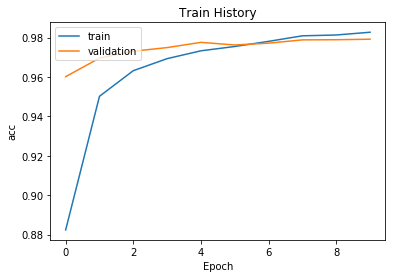

In [70]:
show_train_history(train_history,'acc','val_acc')

In [52]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 41us/step

accuracy= 0.9806
